
# **Capstone Project: Credit Card Fraud Detection using Machine Learning**
## **Mentor:** Dr Pratik Roy
### **Team:**
#### AP19110010429 - Manda Jaswanth
#### AP19110010455 - Kavali Akash
#### AP19110010544 - Pulagam Satwik


## Importing Libraries and Data

In [ ]:
#mounting google drive for importing dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

#for evaluation
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

%matplotlib inline


# Load the Credit Card dataset
data = pd.read_csv("/content/drive/MyDrive/credit card csv/creditcard.csv")

# Success
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data Shape

In [ ]:
data.shape

(284807, 31)

## **Exploratory Analysis**

## Data Visualization

Text(0, 0.5, 'Frequency')

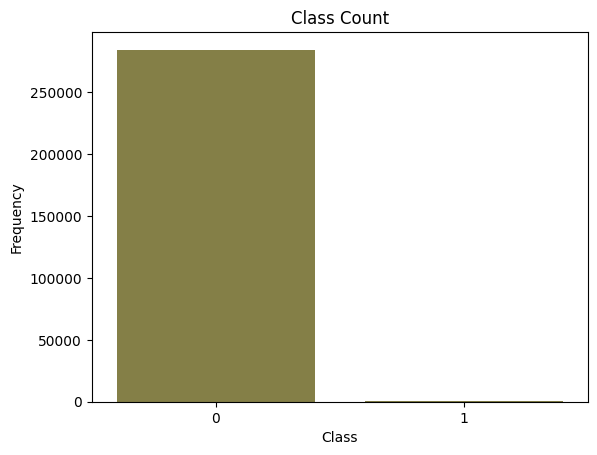

In [ ]:
#Frequency Analysis
class_count = pd.value_counts(data['Class'], sort = True).sort_index()
sns.countplot(x="Class", data=data, color='#8e883d')
plt.title("Class Count")
plt.xlabel("Class")
plt.ylabel("Frequency")

We can see that its a class imbalance problem, because the normal transactions are more than 250000 but the fraud               transactions are very less.

In [ ]:
#splitting the dataset into fraud and normal
fraud = data[data.Class == 1]
normal = data[data.Class == 0]

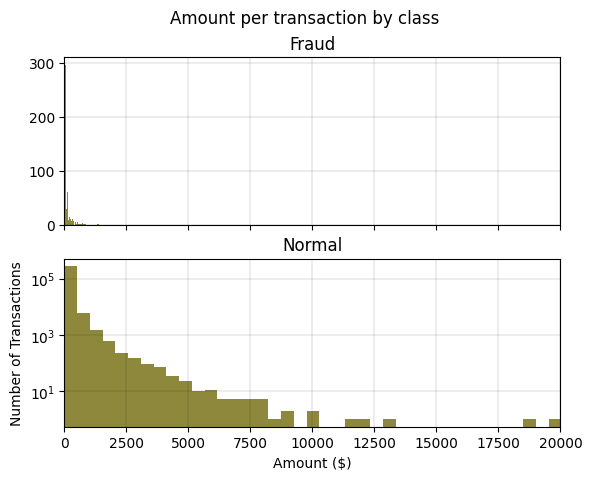

In [ ]:
#histogram plot
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50

ax1.hist(fraud.Amount, bins = bins, color='#8e883d')
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)

ax2.hist(normal.Amount, bins = bins, color='#8e883d')
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

We can see that Normal has more number of transactions over Amount when compared to Fraud Transactions.

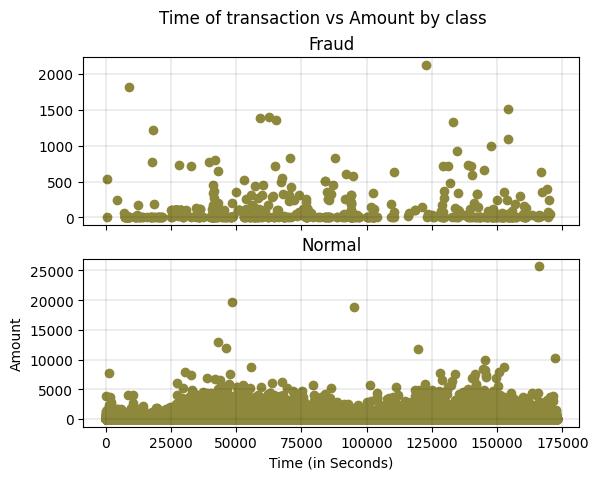

In [ ]:
#scatter plot
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud.Time, fraud.Amount, c='#8e883d')
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)


ax2.scatter(normal.Time, normal.Amount, c='#8e883d')
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)


plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

## **Data Scaling**

## Splitting the data into features and lables

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Splitting the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25)

### SMOTE Resampling

In [ ]:
from imblearn.over_sampling import SMOTE

# minority samples of 40%
smote = SMOTE(sampling_strategy=0.4)

In [ ]:
# Apply SMOTE to the training set only (to avoid data leakage)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

# Determine the midpoint index for splitting the data into halves
midpoint = len(X_train) // 2

# Split X_train and Y_train into two halves
X_train_first_half = X_train[:midpoint]
Y_train_first_half = Y_train[:midpoint]
X_train_second_half = X_train[midpoint:]
Y_train_second_half = Y_train[midpoint:]

# **Machine Learning Models**

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# random forest classifier with 100 D.T (decision trees)
rf = RandomForestClassifier(n_estimators= 100)

In [ ]:
rf.fit(X_train_first_half, Y_train_first_half)

RandomForestClassifier()

In [ ]:
rf_predict_1 = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

rf_accuracy_1 = accuracy_score(Y_test, rf_predict_1)

In [ ]:
print("Accuracy Score 50% of the training dataset in Random forest: {}%".format(round(rf_accuracy_1*100, 2)))

Accuracy Score 50% of the training dataset in Random forest: 99.94%


In [ ]:
rf.fit(X_train_second_half, Y_train_second_half)

RandomForestClassifier()

In [ ]:
rf_predict_2 = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

rf_accuracy_2 = accuracy_score(Y_test, rf_predict_2)

In [ ]:
print("Accuracy Score for 100% of the training dataset in Random forest: {}%".format(round(rf_accuracy_2*100, 2)))

Accuracy Score for 100% of the training dataset in Random forest: 99.91%


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate a Logistic Regression classifier with L2 regularization and C=100
lr = LogisticRegression(penalty='l2', C=100)

In [ ]:
lr.fit(X_train_first_half, Y_train_first_half)

LogisticRegression(C=100)

In [ ]:
lr_predict_1 = lr.predict(X_test)
lr_r1_accuracy_1 = lr.score(X_test, Y_test)

In [ ]:
print("Accuracy Score for 50% of the training dataset in Logistic Regression: {}%".format(round(lr_r1_accuracy_1*100, 2)))

Accuracy Score for 50% of the training dataset in Logistic Regression: 99.88%


In [ ]:
lr.fit(X_train_second_half, Y_train_second_half)

LogisticRegression(C=100)

In [ ]:
lr_predict_2 = lr.predict(X_test)
lr_r1_accuracy_2 = lr.score(X_test, Y_test)

In [ ]:
print("Accuracy Score for whole dataset in Logistic Regression: {}%".format(round(lr_r1_accuracy_2*100, 2)))

Accuracy Score for whole dataset in Logistic Regression: 97.79%


## K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#initialized knn model with the required parameters
knn = KNeighborsClassifier(n_neighbors = 3, metric='euclidean')

In [ ]:
knn.fit(X_train_first_half, Y_train_first_half)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
knn_predict_1 = knn.predict(X_test)
knn_accuracy_1 = knn.score(X_test, Y_test)

In [ ]:
print("Accuracy Score for 50% of the training dataset in KNN: {}%".format(round(knn_accuracy_1*100, 2)))

Accuracy Score for 50% of the training dataset in KNN: 99.84%


In [ ]:
knn.fit(X_train_second_half, Y_train_second_half)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
knn_predict_2 = knn.predict(X_test)
knn_accuracy_2 = knn.score(X_test, Y_test)

In [ ]:
print("Accuracy Score for 100% of the training dataset in KNN: {}%".format(round(knn_accuracy_2*100, 2)))

Accuracy Score for 100% of the training dataset in KNN: 90.62%


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

#initialized naive bayes model with required parameters
nb = GaussianNB()

In [ ]:
nb.fit(X_train_first_half, Y_train_first_half)

GaussianNB()

In [ ]:
nb_predict_1 = nb.predict(X_test)
nb_accuracy_1 = nb.score(X_test, Y_test)

In [ ]:
print("Accuracy Score for 50% of the training dataset in Naive Bayes: {}%".format(round(nb_accuracy_1*100, 2)))

Accuracy Score for 50% of the training dataset in Naive Bayes: 99.32%


In [ ]:
nb.fit(X_train_second_half, Y_train_second_half)

GaussianNB()

In [ ]:
nb_predict_2 = nb.predict(X_test)
nb_accuracy_2 = nb.score(X_test, Y_test)

In [ ]:
print("Accuracy Score for 100% of the training dataset in Naive Bayes: {}%".format(round(nb_accuracy_2*100, 2)))

Accuracy Score for 100% of the training dataset in Naive Bayes: 99.25%


## Artificial Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# define the model
ann = Sequential()
ann.add(Dense(4, input_dim=30, activation='relu')) # input layer and hidden layer
ann.add(Dense(1, activation='sigmoid')) # output layer

# compile the model
ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# fit the model
ann.fit(X_train_first_half, Y_train_first_half, epochs=20, batch_size=32)

Epoch 1/20
4665/4665 [==============================] - 10s 2ms/step - loss: 28.8409 - accuracy: 0.9749
Epoch 2/20
4665/4665 [==============================] - 8s 2ms/step - loss: 0.0942 - accuracy: 0.9981
Epoch 3/20
4665/4665 [==============================] - 9s 2ms/step - loss: 0.0393 - accuracy: 0.9983
Epoch 4/20
4665/4665 [==============================] - 8s 2ms/step - loss: 0.0165 - accuracy: 0.9983
Epoch 5/20
4665/4665 [==============================] - 9s 2ms/step - loss: 0.0150 - accuracy: 0.9983
Epoch 6/20
4665/4665 [==============================] - 9s 2ms/step - loss: 0.0129 - accuracy: 0.9983
Epoch 7/20
4665/4665 [==============================] - 8s 2ms/step - loss: 0.0133 - accuracy: 0.9983
Epoch 8/20
4665/4665 [==============================] - 10s 2ms/step - loss: 0.0128 - accuracy: 0.9983
Epoch 9/20
4665/4665 [==============================] - 9s 2ms/step - loss: 0.0128 - accuracy: 0.9983
Epoch 10/20
4665/4665 [==============================] - 8s 2ms/step - loss: 0.

In [ ]:
# evaluate the model
ann_pred_1 = ann.predict(X_test)
score_1 = ann.evaluate(X_test, Y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])
print("Accuracy Score for 50% of the training dataset in ANN: {}%".format(round(score_1[1]*100, 2)))

2226/2226 [==============================] - 3s 1ms/step
Accuracy Score for 50% of the training dataset in ANN: 99.82%


In [ ]:
# fit the model
ann.fit(X_train, Y_train, epochs=20, batch_size=32)

Epoch 1/20
9330/9330 [==============================] - 17s 2ms/step - loss: 0.8017 - accuracy: 0.7143
Epoch 2/20
9330/9330 [==============================] - 17s 2ms/step - loss: 0.5982 - accuracy: 0.7143
Epoch 3/20
9330/9330 [==============================] - 16s 2ms/step - loss: 0.5982 - accuracy: 0.7143
Epoch 4/20
9330/9330 [==============================] - 16s 2ms/step - loss: 0.5982 - accuracy: 0.7143
Epoch 5/20
9330/9330 [==============================] - 16s 2ms/step - loss: 0.5983 - accuracy: 0.7143
Epoch 6/20
9330/9330 [==============================] - 18s 2ms/step - loss: 0.5983 - accuracy: 0.7143
Epoch 7/20
9330/9330 [==============================] - 17s 2ms/step - loss: 0.5982 - accuracy: 0.7143
Epoch 8/20
9330/9330 [==============================] - 16s 2ms/step - loss: 0.5982 - accuracy: 0.7143
Epoch 9/20
9330/9330 [==============================] - 16s 2ms/step - loss: 0.5983 - accuracy: 0.7143
Epoch 10/20
9330/9330 [==============================] - 16s 2ms/step - l

In [ ]:
# evaluate the model
ann_pred_2 = ann.predict(X_test)
score_2 = ann.evaluate(X_test, Y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])
print("Accuracy Score for 100% of the training dataset in ANN: {}%".format(round(score_2[1]*100, 2)))

2226/2226 [==============================] - 3s 1ms/step
Accuracy Score for 100% of the training dataset in ANN: 99.82%


# **Performace Analysis**

## Classification Report for 50% of training data

#### **Random Forest**

In [ ]:
report = classification_report(Y_test, rf_predict_1)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.89      0.72      0.80       125

    accuracy                           1.00     71202
   macro avg       0.95      0.86      0.90     71202
weighted avg       1.00      1.00      1.00     71202



#### **Logistic Regression**

In [ ]:
report = classification_report(Y_test, lr_predict_1)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.68      0.64      0.66       125

    accuracy                           1.00     71202
   macro avg       0.84      0.82      0.83     71202
weighted avg       1.00      1.00      1.00     71202



#### **K-nearest Neighbour**

In [ ]:
report = classification_report(Y_test, knn_predict_1)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.87      0.10      0.19       125

    accuracy                           1.00     71202
   macro avg       0.93      0.55      0.59     71202
weighted avg       1.00      1.00      1.00     71202



#### **Naive Bayes**

In [ ]:
report = classification_report(Y_test, nb_predict_1)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71077
           1       0.14      0.55      0.22       125

    accuracy                           0.99     71202
   macro avg       0.57      0.77      0.61     71202
weighted avg       1.00      0.99      1.00     71202



#### **ANN**

In [ ]:
# convert predicted probabilities to class labels
ann_pred_labels_1 = (ann_pred_1 > 0.5).astype(int)

# generate classification report
classification_rep = classification_report(Y_test, ann_pred_labels_1)
print(classification_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.00      0.00      0.00       125

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202



## Classification Report for 100% training data

#### **Random Forest**

In [ ]:
report = classification_report(Y_test, rf_predict_2)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.73      0.78      0.76       125

    accuracy                           1.00     71202
   macro avg       0.87      0.89      0.88     71202
weighted avg       1.00      1.00      1.00     71202



#### **Logistic Regression**

In [ ]:
report = classification_report(Y_test, lr_predict_2)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71077
           1       0.06      0.86      0.12       125

    accuracy                           0.98     71202
   macro avg       0.53      0.92      0.55     71202
weighted avg       1.00      0.98      0.99     71202



#### **K-nearest Neighbour**

In [ ]:
report = classification_report(Y_test, knn_predict_2)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     71077
           1       0.01      0.50      0.02       125

    accuracy                           0.91     71202
   macro avg       0.50      0.71      0.48     71202
weighted avg       1.00      0.91      0.95     71202



#### **Naive Bayes**

In [ ]:
report = classification_report(Y_test, nb_predict_2)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71077
           1       0.15      0.69      0.24       125

    accuracy                           0.99     71202
   macro avg       0.57      0.84      0.62     71202
weighted avg       1.00      0.99      0.99     71202



#### **ANN**

In [ ]:
# convert predicted probabilities to class labels
ann_pred_labels_2 = (ann_pred_2 > 0.5).astype(int)

# generate classification report
classification_rep = classification_report(Y_test, ann_pred_labels_2)
print(classification_rep)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.00      0.00      0.00       125

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202



## Aligned Accuracy Table

### AAT for 50% training dataset

In [ ]:
import pandas as pd
import seaborn as sns

model_names = ["Random Forest", "Logistic Regression", "K-nearest Neighbour", "Naive Bayes", "ANN"]
accuracy_scores = [rf_accuracy_1, lr_r1_accuracy_1, knn_accuracy_1, nb_accuracy_1, score_1[1]]

# Sort the scores and model names in descending order
sorted_data = sorted(zip(accuracy_scores, model_names), reverse=True)
sorted_scores, sorted_names = zip(*sorted_data)

# Create a DataFrame with the sorted scores and model names
df = pd.DataFrame({"Model": sorted_names, "Accuracy Score": sorted_scores})

# Apply color to the table using seaborn
cm = sns.light_palette("#8e883d", as_cmap=True)
styled_table = df.style.background_gradient(cmap=cm)

# Display the styled table
styled_table


,Model,Accuracy Score
0,Random Forest,0.999354
1,Logistic Regression,0.998848
2,K-nearest Neighbour,0.998399
3,ANN,0.998244
4,Naive Bayes,0.993231


### AAT for 100% training dataset

In [ ]:
import pandas as pd
import seaborn as sns

model_names = ["Random Forest", "Logistic Regression", "K-nearest Neighbour", "Naive Bayes", "ANN"]
accuracy_scores_1 = [rf_accuracy_1, lr_r1_accuracy_1, knn_accuracy_1, nb_accuracy_1, score_1[1]]
accuracy_scores_2 = [rf_accuracy_2, lr_r1_accuracy_2, knn_accuracy_2, nb_accuracy_2, score_2[1]]

# Sort the scores and model names in descending order
sorted_data = sorted(zip(accuracy_scores_2, model_names), reverse=True)
sorted_scores, sorted_names = zip(*sorted_data)

sorted_scores_1 = []
for item in sorted_names:
  sorted_scores_1.append(accuracy_scores_1[model_names.index(item)])

# Create a DataFrame with the sorted scores and model names
df = pd.DataFrame({"Model": sorted_names, "Accuracy Score(50%)": sorted_scores_1, "Accuracy Score(100%)": sorted_scores})

# Apply color to the table using seaborn
cm = sns.light_palette("#8e883d", as_cmap=True)
styled_table = df.style.background_gradient(cmap=cm)

# Display the styled table
styled_table


,Model,Accuracy Score(50%),Accuracy Score(100%)
0,Random Forest,0.999354,0.999115
1,ANN,0.998244,0.998244
2,Naive Bayes,0.993231,0.992458
3,Logistic Regression,0.998848,0.977936
4,K-nearest Neighbour,0.998399,0.906168


## Accuracy Plot

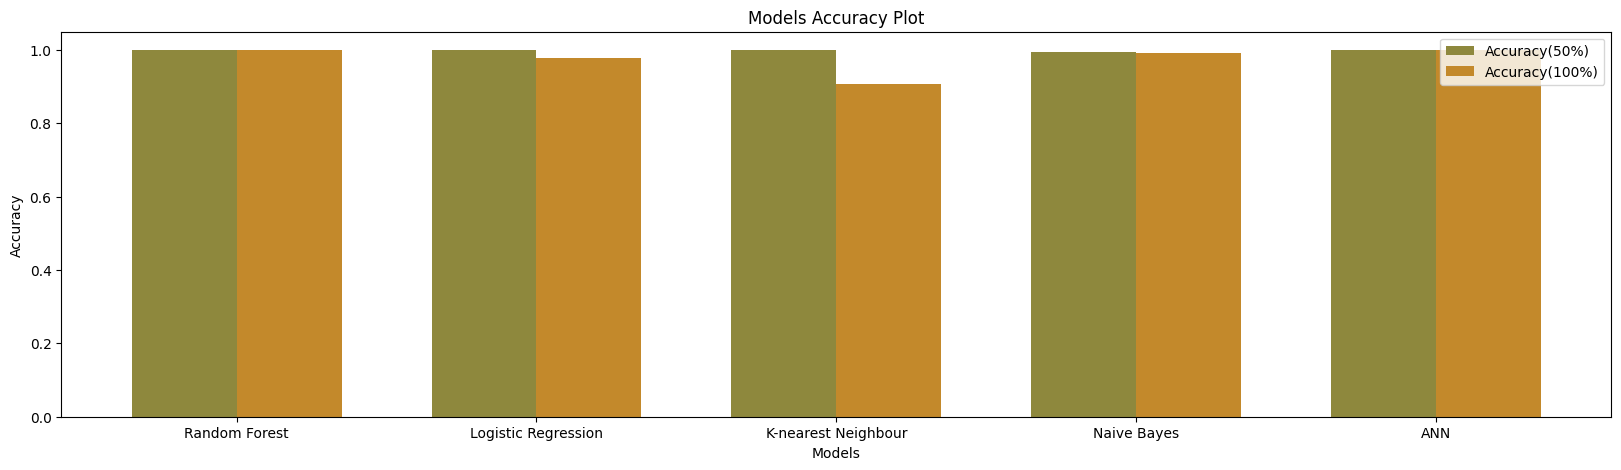

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = {'Random Forest': [rf_accuracy_1, rf_accuracy_2],
        'Logistic Regression': [lr_r1_accuracy_1, lr_r1_accuracy_2],
        'K-nearest Neighbour': [knn_accuracy_1, knn_accuracy_2],
        'Naive Bayes': [nb_accuracy_1, nb_accuracy_2],
        'ANN': [score_1[1], score_2[1]]
       }
models = list(data.keys())

fig = plt.figure(figsize=(20, 5))

# Calculate the width for each bar
bar_width = 0.35
index = np.arange(len(models))

# Plot the first accuracy score
plt.bar(index, [data[model][0] for model in models], color='#8e883d', width=bar_width, label='Accuracy(50%)')

# Plot the second accuracy score next to the first one
plt.bar(index + bar_width, [data[model][1] for model in models], color='#c3892b', width=bar_width, label='Accuracy(100%)')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Models Accuracy Plot")
plt.xticks(index + bar_width / 2, models)
plt.legend()
plt.show()

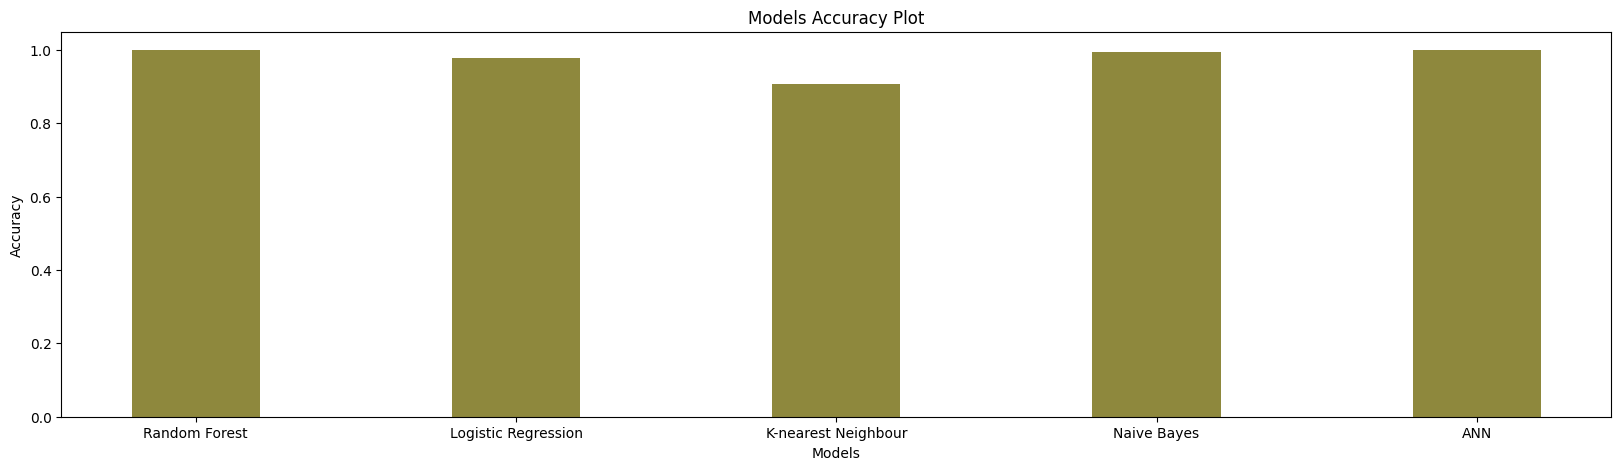

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = {'Random Forest': rf_accuracy_2,
        'Logistic Regression': lr_r1_accuracy_2,
        'K-nearest Neighbour': knn_accuracy_2,
        'Naive Bayes': nb_accuracy_2,
        'ANN': score_2[1]
      }
models = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (20, 5))

plt.bar(models, values, color ='#8e883d',
        width = 0.4)

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Models Accuracy Plot")
plt.show()


## **Summary**

After comparing different machine learning models for credit card fraud detection, we found that Random Forest performed the best. It uses decision trees and combines their predictions to make accurate fraud detection. Random Forest is good at handling large amounts of data, dealing with imbalanced data. Although Naive Bayes and Artificial Neural Network also did well, Random Forest is the most suitable choice because it is accurate, reliable, and easy to understand for detecting credit card fraud in real-life situations.